In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('nue_crime_data.csv')
train=pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')
train.head()

,Dates,Times,Crime_types,Locations,LCDAs,population,Time of Day,day,Month,year,day_of_week,quarter,season,IsHoliday
0,2019-11-18,02:50:00,Fire Outbreak,Sala Street,Isolo,4814647,Midnight,Monday,November,2019,0,4,dry season,False
1,2019-11-18,02:55:00,Robbery,"21 Maiyaki street, Isokoko",Agege,4383983,Midnight,Monday,November,2019,0,4,dry season,False
2,2019-11-18,03:00:00,Robbery,43 Oduduwa Street. Iyana Oworo,Kosofe,3996193,Midnight,Monday,November,2019,0,4,dry season,False
3,2019-11-18,03:50:00,Robbery,Opewale Street,Agege,4383983,Midnight,Monday,November,2019,0,4,dry season,False
4,2019-11-18,21:45:00,Robbery,"Suliaman Street, Agunji",Eti-Osa East,4173713,Evening,Monday,November,2019,0,4,dry season,False


<AxesSubplot:>

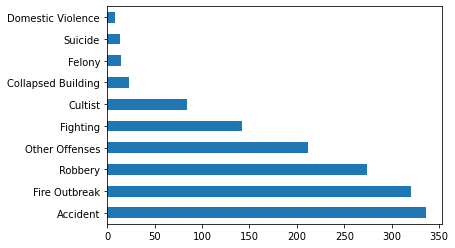

In [3]:
df.Crime_types.value_counts().plot.barh()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dates        1428 non-null   object 
 1   Times        1420 non-null   object 
 2   Crime_types  1428 non-null   object 
 3   Locations    1395 non-null   object 
 4   LCDAs        1389 non-null   object 
 5   population   1392 non-null   float64
 6   Time of Day  1337 non-null   object 
 7   day          1428 non-null   object 
 8   Month        1428 non-null   object 
 9   year         1428 non-null   int64  
 10  day_of_week  1428 non-null   int64  
 11  quarter      1428 non-null   int64  
 12  season       1428 non-null   object 
 13  IsHoliday    1428 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(9)
memory usage: 146.6+ KB


In [5]:
# join train and test together
ntrain = train.shape[0]
ntest = test.shape[0]

crime_df = pd.concat((train, test)).reset_index(drop=True)
print("crime_df size is : {}".format(crime_df.shape))

crime_df size is : (1428, 14)


In [6]:
# Check for non-numeric values
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].str.isnumeric().any() == False:
            df = df[~df[col].isin(['NA', 'inf', '-inf'])]

# Convert the column to an integer
df['population'] = pd.to_numeric(df['population'], errors='coerce').fillna(0).astype(int)


In [7]:
# Check for non-numeric values
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].str.isnumeric().any() == False:
            df = df[~df[col].isin(['NA', 'inf', '-inf'])]

# Convert the column to an integer
crime_df['population'] = pd.to_numeric(crime_df['population'], errors='coerce').fillna(0).astype(int)


In [8]:
df['population']=df['population'].astype(int)

crime_df['population']=crime_df['population'].astype(int)

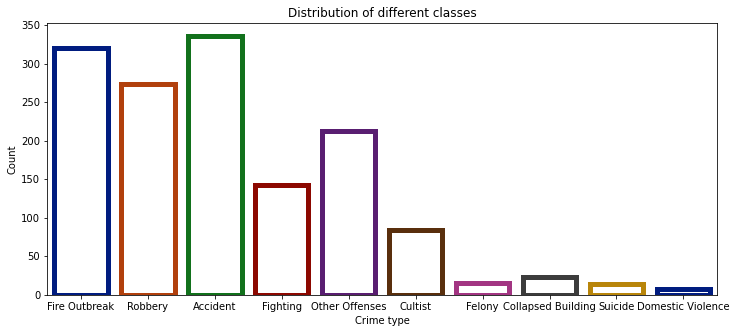

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

ax = plt.figure(figsize=(12,5))
sns.countplot(x = 'Crime_types', data = crime_df, facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 9))
plt.xlabel('Crime type')
plt.ylabel('Count')
plt.title('Distribution of different classes')
plt.show()

In [12]:
crime_df.columns

Index(['Dates', 'Times', 'Crime_types', 'Locations', 'LCDAs', 'population',
       'Time of Day', 'day', 'Month', 'year', 'day_of_week', 'quarter',
       'season', 'IsHoliday'],
      dtype='object')

In [14]:
# Use spline interpolation to fill missing values in the 'Times' column
    
crime_df['Time of Day'] = crime_df['Time of Day'].fillna('Midnight')

crime_df['Times'] = crime_df['Times'].interpolate(method='nearest')

crime_df = crime_df.dropna(subset=['LCDAs'])
crime_df = crime_df.dropna(subset=['Locations'])
crime_df = crime_df.dropna(subset=['Times'])


In [15]:
print("Are There still Missing value in data? :",crime_df.isnull().any().any())
print((crime_df.isnull().sum()/crime_df.shape[0])*100)

Are There still Missing value in data? : False
Dates          0.0
Times          0.0
Crime_types    0.0
Locations      0.0
LCDAs          0.0
population     0.0
Time of Day    0.0
day            0.0
Month          0.0
year           0.0
day_of_week    0.0
quarter        0.0
season         0.0
IsHoliday      0.0
dtype: float64


In [16]:
crime_df.columns

Index(['Dates', 'Times', 'Crime_types', 'Locations', 'LCDAs', 'population',
       'Time of Day', 'day', 'Month', 'year', 'day_of_week', 'quarter',
       'season', 'IsHoliday'],
      dtype='object')

In [18]:
#Binary indicators for each crime type

# Perform one-hot encoding on the 'crime_types' column
encoded_crime_types = pd.get_dummies(crime_df['Crime_types'])

# Merge the encoded crime types back into the original DataFrame
crime_df = pd.concat([crime_df, encoded_crime_types], axis=1)


In [19]:
#encode categorical variable

from sklearn.preprocessing import LabelEncoder
for i in ['Time of Day', 'Month', 'season', 'IsHoliday']:
  encoder = LabelEncoder()
  crime_df[str(i)] = encoder.fit_transform(crime_df[str(i)])
    
#Drop duplicate column

crime_df.drop(['day'], axis=1, inplace= True)

In [20]:
crime_df['LCDAs'] = crime_df['LCDAs'].map(crime_df['LCDAs'].value_counts().to_dict())
crime_df['Locations'] = crime_df['Locations'].map(crime_df['Locations'].value_counts().to_dict())
crime_df['Times']=crime_df['Times'].map(crime_df['Times'].value_counts().to_dict())

In [21]:
counter = crime_df['Crime_types'].value_counts()
for k,v in counter.items():
    per = v / len(df['Crime_types']) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

Class=Accident, n=327 (22.899%)
Class=Fire Outbreak, n=318 (22.269%)
Class=Robbery, n=274 (19.188%)
Class=Other Offenses, n=182 (12.745%)
Class=Fighting, n=140 (9.804%)
Class=Cultist, n=81 (5.672%)
Class=Collapsed Building, n=23 (1.611%)
Class=Felony, n=15 (1.050%)
Class=Suicide, n=12 (0.840%)
Class=Domestic Violence, n=8 (0.560%)


In [22]:
le = LabelEncoder()

In [23]:
crime_df['Crime_types'] = le.fit_transform(crime_df['Crime_types'])

In [24]:
crime_df.head()

,Dates,Times,Crime_types,Locations,LCDAs,population,Time of Day,Month,year,day_of_week,...,Accident,Collapsed Building,Cultist,Domestic Violence,Felony,Fighting,Fire Outbreak,Other Offenses,Robbery,Suicide
0,2019-11-18,5,6,1,22,4814647,2,9,2019,0,...,0,0,0,0,0,0,1,0,0,0
1,2019-11-18,6,8,1,71,4383983,2,9,2019,0,...,0,0,0,0,0,0,0,0,1,0
2,2019-11-18,5,8,1,125,3996193,2,9,2019,0,...,0,0,0,0,0,0,0,0,1,0
3,2019-11-18,10,8,1,71,4383983,2,9,2019,0,...,0,0,0,0,0,0,0,0,1,0
4,2019-11-18,5,8,1,69,4173713,1,9,2019,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
#Save Dataset for further Analysis

crime_df.to_csv('le_crime_data.csv', index=False)

<AxesSubplot:ylabel='Density'>

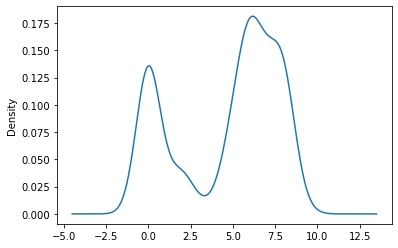

In [25]:
crime_df.Crime_types.plot(kind='density')

<AxesSubplot:>

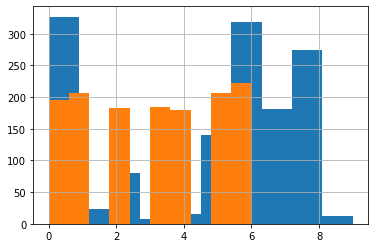

In [26]:
crime_df['Crime_types'].hist()

crime_df['day_of_week'].hist()

In [27]:
le_class = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for different classes:") 
print(le_class)

Sklearn label encoder results for different classes:
{'Accident': 0, 'Collapsed Building': 1, 'Cultist': 2, 'Domestic Violence': 3, 'Felony': 4, 'Fighting': 5, 'Fire Outbreak': 6, 'Other Offenses': 7, 'Robbery': 8, 'Suicide': 9}


In [31]:
print("Are There still Missing value in data? :",crime_df.isnull().any().any())
print((crime_df.isnull().sum()/crime_df.shape[0])*100)

Are There still Missing value in data? : True
Dates                  0.000000
Times                  0.000000
Crime_types            0.000000
Locations              0.000000
LCDAs                  0.000000
population             0.000000
Time of Day            0.000000
Month                  0.000000
year                   0.000000
day_of_week            0.000000
quarter                0.000000
season                 0.000000
IsHoliday              0.000000
crime_category        14.057971
Accident               0.000000
Collapsed Building     0.000000
Cultist                0.000000
Domestic Violence      0.000000
Felony                 0.000000
Fighting               0.000000
Fire Outbreak          0.000000
Other Offenses         0.000000
Robbery                0.000000
Suicide                0.000000
dtype: float64


In [32]:
crime_df['crime_category'] = crime_df['crime_category'].interpolate(method='nearest')

In [33]:
for i in ['crime_category']:
  encoder = LabelEncoder()
  crime_df[str(i)] = encoder.fit_transform(crime_df[str(i)])

In [34]:
crime_df.drop(columns=['Dates', 'IsHoliday'],inplace=True)

#Get the new dataset
train_n = crime_df[:ntrain].copy()
test_n = crime_df[ntrain:].copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = pd.DataFrame(data= scaler.fit_transform(crime_df), columns=crime_df.columns)
df1.isna().sum()

## SMOTE

### Using SMOTE for Imbalance Target Varaible

#### SMOTE is an over-sampling method which means it adds more samples from under-represented classes. So basically it creates synthetic samples of the minority class. 

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
import warnings
warnings.filterwarnings("ignore")

In [37]:
X = crime_df.drop('Crime_types', axis = 1)
y = crime_df['Crime_types']

In [38]:
#one-hot encoding the features
X = pd.get_dummies(X)

In [39]:
oversample = SMOTE()

In [40]:
X, y = oversample.fit_resample(X, y)

Class=6, n=327 (10.000%)
Class=8, n=327 (10.000%)
Class=0, n=327 (10.000%)
Class=5, n=327 (10.000%)
Class=7, n=327 (10.000%)
Class=2, n=327 (10.000%)
Class=4, n=327 (10.000%)
Class=1, n=327 (10.000%)
Class=9, n=327 (10.000%)
Class=3, n=327 (10.000%)


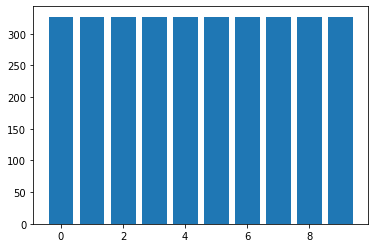

In [41]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## Model building

In [42]:
df1 = pd.concat([X, y], axis=1, join='outer')
print(df1.shape)

(3270, 22)


In [43]:
df1.head()

,Times,Locations,LCDAs,population,Time of Day,Month,year,day_of_week,quarter,season,...,Collapsed Building,Cultist,Domestic Violence,Felony,Fighting,Fire Outbreak,Other Offenses,Robbery,Suicide,Crime_types
0,5,1,22,4814647,2,9,2019,0,4,0,...,0,0,0,0,0,1,0,0,0,6
1,6,1,71,4383983,2,9,2019,0,4,0,...,0,0,0,0,0,0,0,1,0,8
2,5,1,125,3996193,2,9,2019,0,4,0,...,0,0,0,0,0,0,0,1,0,8
3,10,1,71,4383983,2,9,2019,0,4,0,...,0,0,0,0,0,0,0,1,0,8
4,5,1,69,4173713,1,9,2019,0,4,0,...,0,0,0,0,0,0,0,1,0,8


from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df2 = pd.DataFrame(data= minmax.fit_transform(df1), columns=df1.columns)
df2.isna().sum()

In [44]:
train_df = df1[df1['Crime_types'].isna()== False]
test_df = df1[df1['Crime_types'].isna()== False]

test_df.drop('Crime_types', axis=1, inplace=True)
print(test_df.shape, train_df.shape)

(3270, 21) (3270, 22)


In [46]:
X = train_df.drop('Crime_types', axis=1)
y = train_df['Crime_types'].astype(int)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2616, 21)
(2616,)
(654, 21)
(654,)


In [49]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [50]:
X_train = minmax.fit_transform(X_train)

In [51]:
print(X_train.shape)

(2616, 21)


In [52]:
from sklearn.ensemble import RandomForestClassifier
weights = {0: 3.0, 1: 2.0, 2: 1.0, 3: 1.5, 4: 2.5, 5: 1.0, 6: 2.0, 7: 3.5, 8: 2.0, 9: 2.5}
m1 = RandomForestClassifier(n_estimators=100,class_weight = weights)

m1.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 3.0, 1: 2.0, 2: 1.0, 3: 1.5, 4: 2.5,
                                     5: 1.0, 6: 2.0, 7: 3.5, 8: 2.0, 9: 2.5})

In [53]:
# make predictions
y_pred = m1.predict(X_test)

In [ ]:
# evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

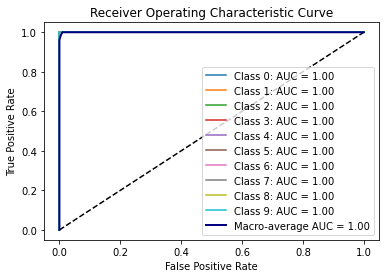

In [56]:

from sklearn.preprocessing import label_binarize

# Fit the classifier
m1.fit(X_train, y_train)

# Predict probabilities on the test set
y_score = m1.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=m1.classes_)

# Compute the FPR, TPR, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(m1.classes_)):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the macro-average AUC score
fpr_macro, tpr_macro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot the ROC curve for each class
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
for i in range(len(m1.classes_)):
    plt.plot(fpr[i], tpr[i], label='Class {}: AUC = {:.2f}'.format(i, roc_auc[i]))
plt.plot(fpr_macro, tpr_macro, label='Macro-average AUC = {:.2f}'.format(roc_auc_macro), color='navy', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


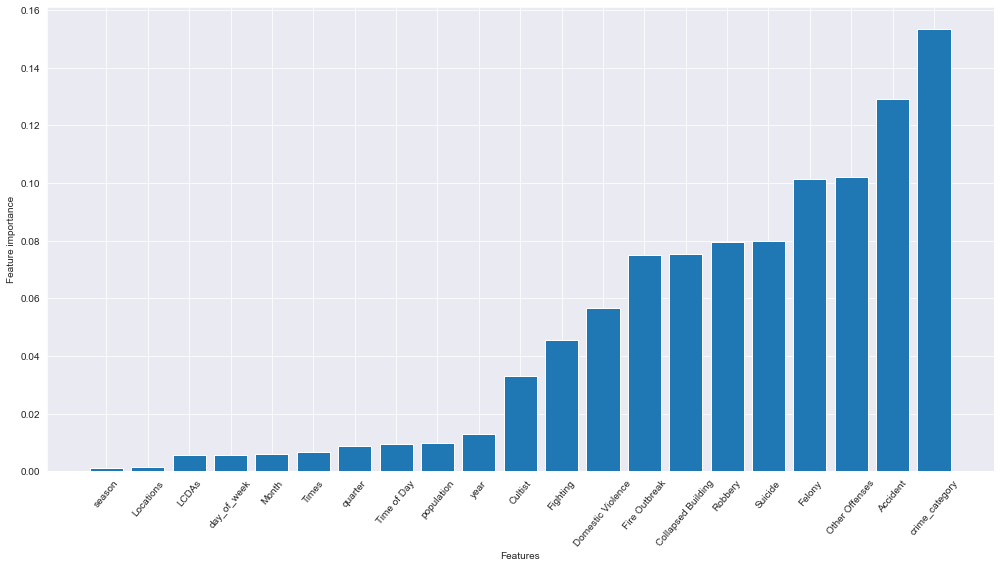

In [57]:
importance = m1.feature_importances_
col_sorted_by_importance=importance.argsort()

# Passing the sorted feature importance into a dataframe
feat_imp3=pd.DataFrame({
    'cols':test_df.columns[col_sorted_by_importance],
    'imps':importance[col_sorted_by_importance]
})

# plot feature importance
plt.figure(figsize=(14,8))
sns.set_style("darkgrid")
plt.bar(x='cols', height='imps',data=feat_imp3)
plt.ylabel('Feature importance')
plt.xlabel('Features')
plt.xticks(rotation=50)
plt.tight_layout()

In [58]:
from sklearn.neighbors import KNeighborsClassifier

m2 = KNeighborsClassifier(n_neighbors=10)
m2.fit(X_train, y_train)

# make predictions
y_pred = m2.predict(X_test)

# evaluate model performance

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.1651376146788991
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.00      0.00      0.00        62
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        66
           5       0.00      0.00      0.00        71
           6       0.14      0.87      0.24        79
           7       1.00      0.03      0.06        66
           8       0.25      0.50      0.33        74
           9       0.00      0.00      0.00        60

    accuracy                           0.17       654
   macro avg       0.14      0.14      0.06       654
weighted avg       0.15      0.17      0.07       654



In [59]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
m3 = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
m3.fit(X_train, y_train)

y_pred = m3.predict(X_test)

# evaluate model performance

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.09021406727828746
Classification Report:
              precision    recall  f1-score   support

           0       0.09      1.00      0.17        59
           1       0.00      0.00      0.00        62
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        66
           5       0.00      0.00      0.00        71
           6       0.00      0.00      0.00        79
           7       0.00      0.00      0.00        66
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        60

    accuracy                           0.09       654
   macro avg       0.01      0.10      0.02       654
weighted avg       0.01      0.09      0.01       654



In [60]:
from xgboost import XGBClassifier
from collections import Counter

In [61]:
m4=XGBClassifier(scale_pos_weight=8.1922929, max_depth=10, learning_rate=0.143242, n_estimators=800, silent=True, metrics='auc',colsample_bylevel=0.8, reg_alpha=0.8)
m4.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(m4, X_train, y_train, cv=5, scoring='accuracy')

print('Cross-validation scores:', scores)
print('Average score:', scores.mean())

[01:40:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "metrics", "scale_pos_weight", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:40:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "metrics", "scale_pos_weight", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:41:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parame

In [62]:
y_pred = m4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        66
           5       1.00      1.00      1.00        71
           6       1.00      1.00      1.00        79
           7       1.00      1.00      1.00        66
           8       1.00      1.00      1.00        74
           9       1.00      1.00      1.00        60

    accuracy                           1.00       654
   macro avg       1.00      1.00      1.00       654
weighted avg       1.00      1.00      1.00       654



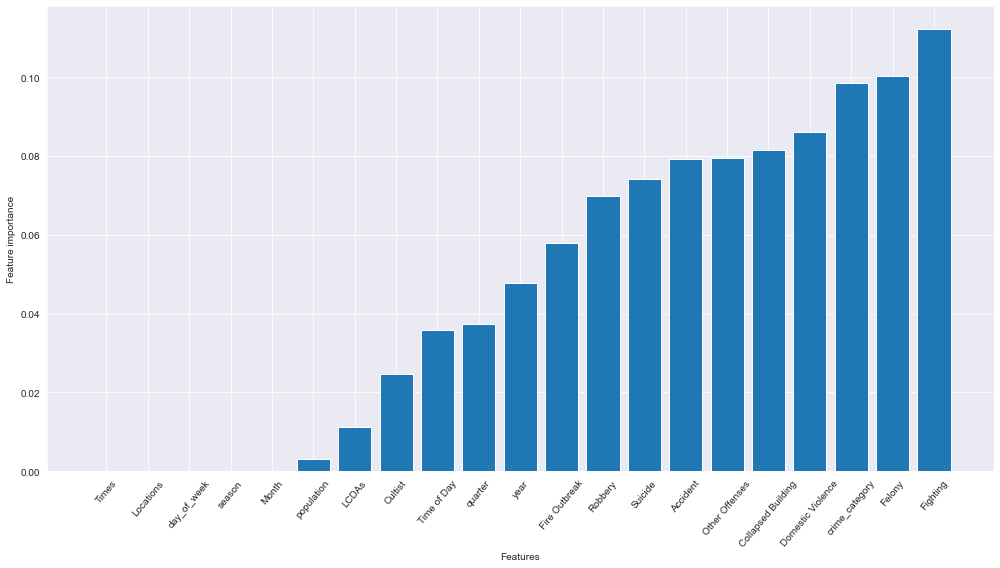

In [63]:
importance = m4.feature_importances_
col_sorted_by_importance=importance.argsort()

# Passing the sorted feature importance into a dataframe
feat_imp3=pd.DataFrame({
    'cols':test_df.columns[col_sorted_by_importance],
    'imps':importance[col_sorted_by_importance]
})

# plot feature importance
plt.figure(figsize=(14,8))
sns.set_style("darkgrid")
plt.bar(x='cols', height='imps',data=feat_imp3)
plt.ylabel('Feature importance')
plt.xlabel('Features')
plt.xticks(rotation=50)
plt.tight_layout()

In [64]:
m6 = RandomForestClassifier(n_estimators=100, class_weight = weights,max_depth=10)
m6.fit(X_train, y_train)

# predict on test set
y_pred = m6.predict_proba(X_test)

# calculate macro-average AUC score
auc_scores = roc_auc_score(y_test, y_pred, multi_class='ovo')
macro_auc = np.mean(auc_scores)

print("Macro-average AUC score:", macro_auc)


Macro-average AUC score: 1.0


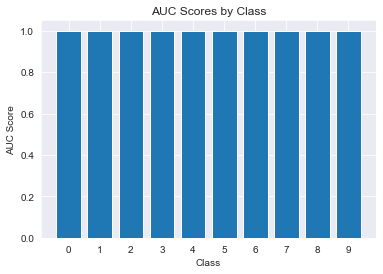

In [65]:
# predict on test set and calculate AUC scores for each class
y_pred = m6.predict_proba(X_test)
auc_scores = roc_auc_score(y_test, y_pred, multi_class='ovo')

# plot AUC scores for each class
num_classes = len(m6.classes_)
classes = np.arange(num_classes)
plt.bar(classes, auc_scores)
plt.xticks(classes)
plt.xlabel('Class')
plt.ylabel('AUC Score')
plt.title('AUC Scores by Class')
plt.show()


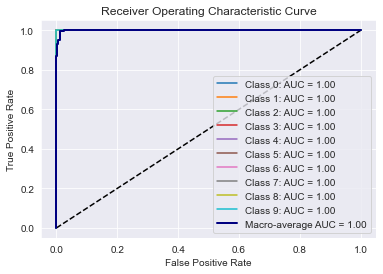

In [66]:
import numpy as np

from sklearn.preprocessing import label_binarize

# Fit the classifier
m6.fit(X_train, y_train)

# Predict probabilities on the test set
y_score = m6.predict_proba(X_test)

# Binarize the labels (if not already done)
y_test_bin = label_binarize(y_test, classes=m6.classes_)

# Compute the FPR, TPR, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(m6.classes_)):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the macro-average AUC score
fpr_macro, tpr_macro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot the ROC curve for each class
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
for i in range(len(m6.classes_)):
    plt.plot(fpr[i], tpr[i], label='Class {}: AUC = {:.2f}'.format(i, roc_auc[i]))
plt.plot(fpr_macro, tpr_macro, label='Macro-average AUC = {:.2f}'.format(roc_auc_macro), color='navy', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [67]:
y_pred = m6.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9770642201834863
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        66
           5       1.00      0.79      0.88        71
           6       1.00      1.00      1.00        79
           7       0.81      1.00      0.90        66
           8       1.00      1.00      1.00        74
           9       1.00      1.00      1.00        60

    accuracy                           0.98       654
   macro avg       0.98      0.98      0.98       654
weighted avg       0.98      0.98      0.98       654



In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fit the classifier
m4.fit(X_train, y_train)

# Predict on the test set
y_pred = m4.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=m4.classes_)
cm


array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 62,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 67,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 66,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0, 21],
       [ 0,  0,  0,  0,  0,  0, 79,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 66,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 74,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 60]], dtype=int64)

In [74]:
test_data = minmax.fit_transform(test_df)

In [75]:
prediction = m4.predict(test_data)
prediction

array([6, 8, 8, ..., 9, 9, 9], dtype=int64)

In [84]:
target = le.inverse_transform(prediction)
target

array(['Fire Outbreak', 'Robbery', 'Robbery', ..., 'Suicide', 'Suicide',
       'Suicide'], dtype=object)

In [77]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(target)

['Fire Outbreak' 'Robbery' 'Robbery' ... 'Suicide' 'Suicide' 'Suicide']


In [78]:

# Convert the predicted target to a dataframe
pred_df = pd.DataFrame(target, columns=['Prediction'])

# Save the dataframe to a CSV file
pred_df.to_csv('predictions.csv', index=False)


[01:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "metrics", "scale_pos_weight", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




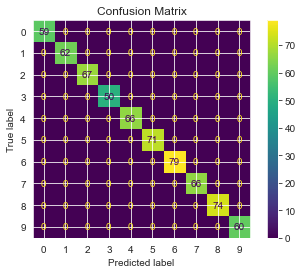

In [80]:


# Fit the classifier
m4.fit(X_train, y_train)

# Predict on the test set
y_pred = m4.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=m4.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m4.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


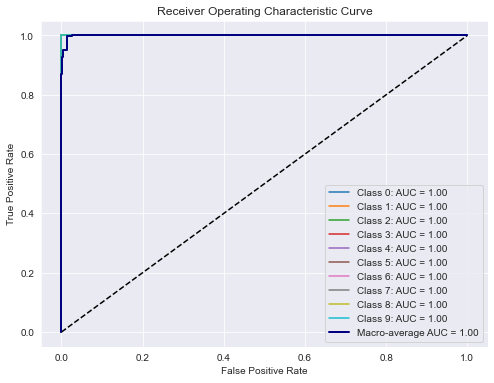

In [82]:


# Binarize the labels (if not already done)
y_test_bin = label_binarize(y_test, classes=m4.classes_)

# Compute the FPR, TPR, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(m4.classes_)):
    fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the macro-average AUC score
fpr_macro, tpr_macro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(len(m4.classes_)):
    plt.plot(fpr[i], tpr[i], label='Class {}: AUC = {:.2f}'.format(i, roc_auc[i]))
plt.plot(fpr_macro, tpr_macro, label='Macro-average AUC = {:.2f}'.format(roc_auc_macro), color='navy', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

